In [ ]:
# installing libraries
install.packages('vegan')
install.packages("plotrix")
install.packages("plot3D")

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Heatplus")
install.packages("reshape")
install.packages("gplots")
install.packages("agricolae")
install.packages("patternplot")

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("phyloseq")

In [40]:
library(MASS)
library(vegan)
library(ggplot2)
library(plotrix)
library("plot3D")
library (Heatplus)
library(reshape)
library(dplyr)
library(RColorBrewer)
library(gplots)
library(readxl)
library(patternplot)
library(agricolae)
library("phyloseq")
library("ggplot2")      # graphics
library("tibble")

## Figure 6

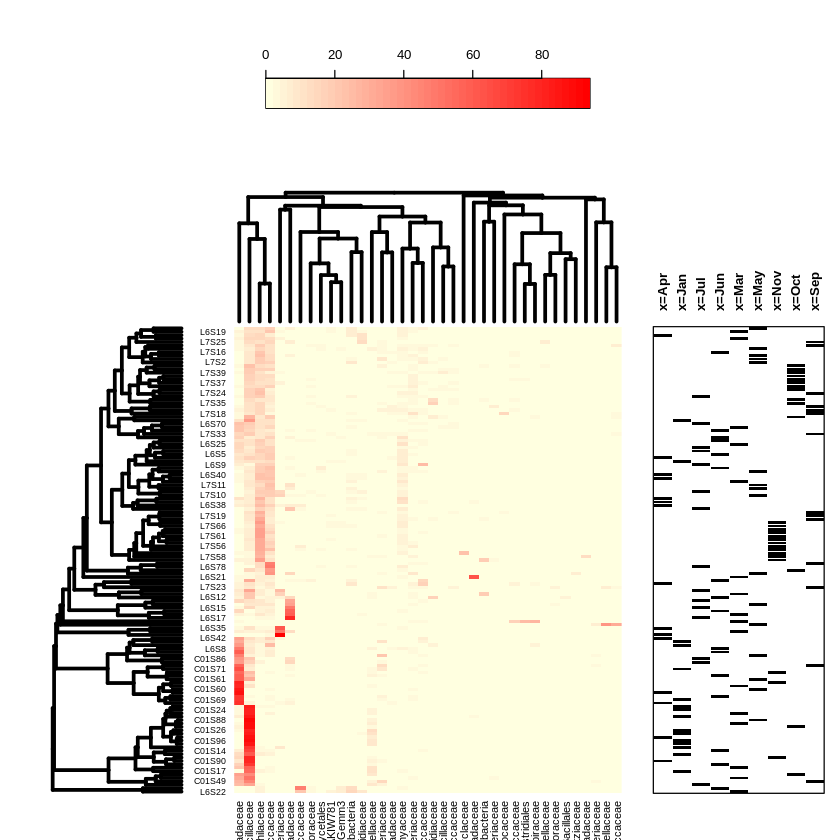

In [2]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",row.names=1,na.strings = "NA",fill=T)
write.table(otu,"x.txt",sep=",",quote=FALSE)
otu <- read.csv("x.txt", header=T, na.strings="")
otu<-otu[ rowSums(otu[,1:(dim(otu)[2]-7)]) >= 10, ]
otu<-otu[,1:(dim(otu)[2]-2)]
 otu$expected2<-apply(otu[,1:(dim(otu)[2])],1,
                      function(x) last(na.omit(x)
                                      )
                     )
 otu<-aggregate(otu[,1:(dim(otu)[2]-6)],by=list(otu$expected2),FUN=sum)

row.names(otu)<-otu[,1]
otu<-otu[,-1]
otu<-t(otu)

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$INC=="core_all",]# & map$Endo_exo=="Epi" ,]#& map$Face=="S" ,]#& map$Tree=="23",]

x1<-subset(otu[rownames(map),])
p<-cbind(map,x1)                    
#rownames(p)<-p$Description

m<-p[,((dim(map)[2])+1):dim(p)[2]]
m<-m[,!!colSums(m)]
m<-decostand(m,method="total")   

maxab <- apply(m, 2, max)                 
n1 <- names(which(maxab < 0.05))
mat<- as.matrix(m[, -which(names(m) %in% n1)])
mat<-mat*100
data.dist <- vegdist((mat), method = "bray")
row.clus <- hclust(data.dist, "complete")
data.dist.g <- vegdist(t(mat), method = "bray")
col.clus <- hclust(data.dist.g, "complete")

#pdf("endo_heatmap.pdf")
plot(annHeatmap2(mat,scale="none",
                 col = colorRampPalette(c("lightyellow", "red"),space = "rgb")(47),
                 breaks = 54,
                 dendrogram = list(Row = list(dendro = as.dendrogram(row.clus)),
                                   Col = list(dendro = as.dendrogram(col.clus))),
                 legend = 3,
                 labels = list(Col = list(nrow = 0.002)),
                 ann = list(Row = list(data = map$Month))
                )
    )
#dev.off()


## Figure 5A


Call:
anosim(x = (as.matrix((vegdist(ppp, distance = "bray")))), grouping = p$tree_species) 
Dissimilarity: user supplied square matrix 

ANOSIM statistic R: 0.009857 
      Significance: 0.112 

Permutation: free
Number of permutations: 999


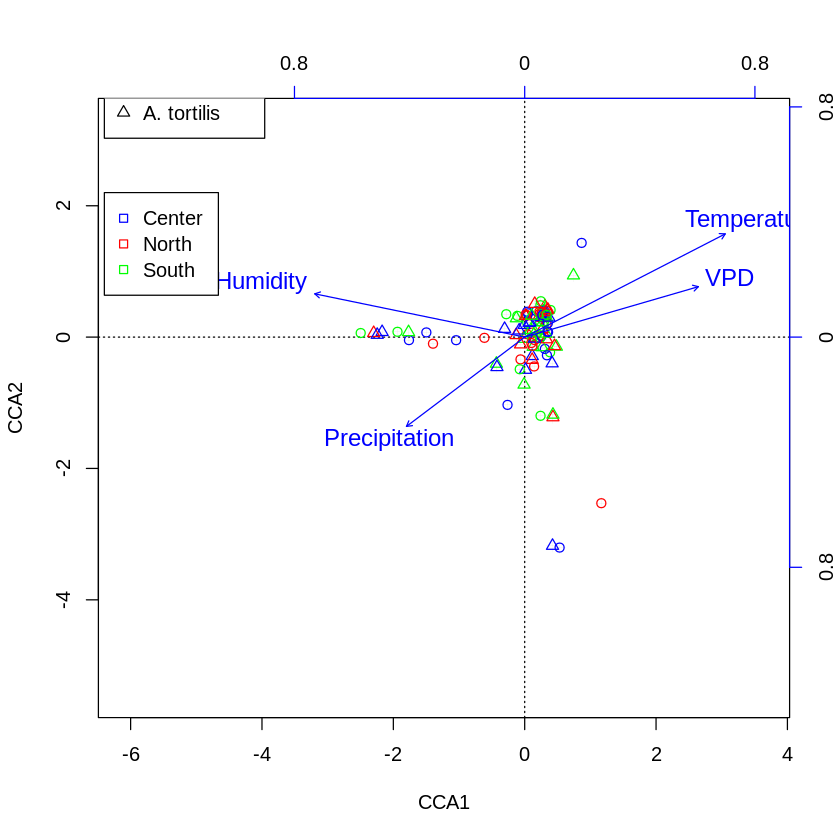

In [3]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
t_otus<-decostand(t_otus,method="total")

map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$INC=="core_all",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")

p<-p[p$sample_type=="Epiphytes",]
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]
ppp<-pp[,!!colSums(pp)]
l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$tree_species)
l



colfunc<-colorRampPalette(c("blue", "red","green"))
#pdf("CCA_exo.pdf")
ab<-cca(ppp~VPD+Humidity+Precipitation+Temperature+GI+RI,p)
plot(ab,type="n",scaling=1)
with(ppp,points(ab,display="sites",col="gray",pch=3,lwd=0.1,scaling=1))
with(ppp,points(ab,col=colfunc(3)[p$Canopy],display="sites",scaling=1,pch=unique(as.numeric(p$tree_species))))
fit<-envfit(ab~VPD+Humidity+Precipitation+Temperature+GI+RI,p,strata=p$tree_species)
plot(fit, cex=1.2, axis=TRUE,p.max=0.05)
legend(x=-6.4,y=4.2,legend=unique(p$tree_species),pch=unique(as.numeric(p$tree_species)))
legend(x=-6.4,y=2.2,legend=unique(p$Canopy),col=colfunc(3)[unique(p$Canopy)],pch=c(22))
# #dev.off()
# fit

## Figure 5B

Run 0 stress 0.05998507 
Run 1 stress 0.0719345 
Run 2 stress 0.06612617 
Run 3 stress 0.05998506 
... New best solution
... Procrustes: rmse 0.0001082513  max resid 0.0002422208 
... Similar to previous best
Run 4 stress 0.06626839 
Run 5 stress 0.08111316 
Run 6 stress 0.08494559 
Run 7 stress 0.08410727 
Run 8 stress 0.06612619 
Run 9 stress 0.07087705 
Run 10 stress 0.07080587 
Run 11 stress 0.06672215 
Run 12 stress 0.07917318 
Run 13 stress 0.07867188 
Run 14 stress 0.08582085 
Run 15 stress 0.08607992 
Run 16 stress 0.07402798 
Run 17 stress 0.07548178 
Run 18 stress 0.06721693 
Run 19 stress 0.07805298 
Run 20 stress 0.06686477 
*** Solution reached



Call:
anosim(x = (as.matrix((vegdist(ppp, distance = "bray")))), grouping = p$shedding,      strata = p$sample_type) 
Dissimilarity: user supplied square matrix 

ANOSIM statistic R: 0.08044 
      Significance: 0.072 

Blocks:  strata 
Permutation: free
Number of permutations: 999



***VECTORS

                  CCA1     CCA2     r2 Pr(>r)  
VPD           -0.40831  0.91284 0.1378  0.121  
Humidity      -0.26404 -0.96451 0.1158  0.196  
Precipitation  0.53557 -0.84449 0.2268  0.020 *
Temperature   -0.42136  0.90689 0.2120  0.038 *
GI             0.15253 -0.98830 0.1853  0.046 *
RI             0.27038  0.96275 0.0417  0.537  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Blocks:  strata 
Permutation: free
Number of permutations: 999



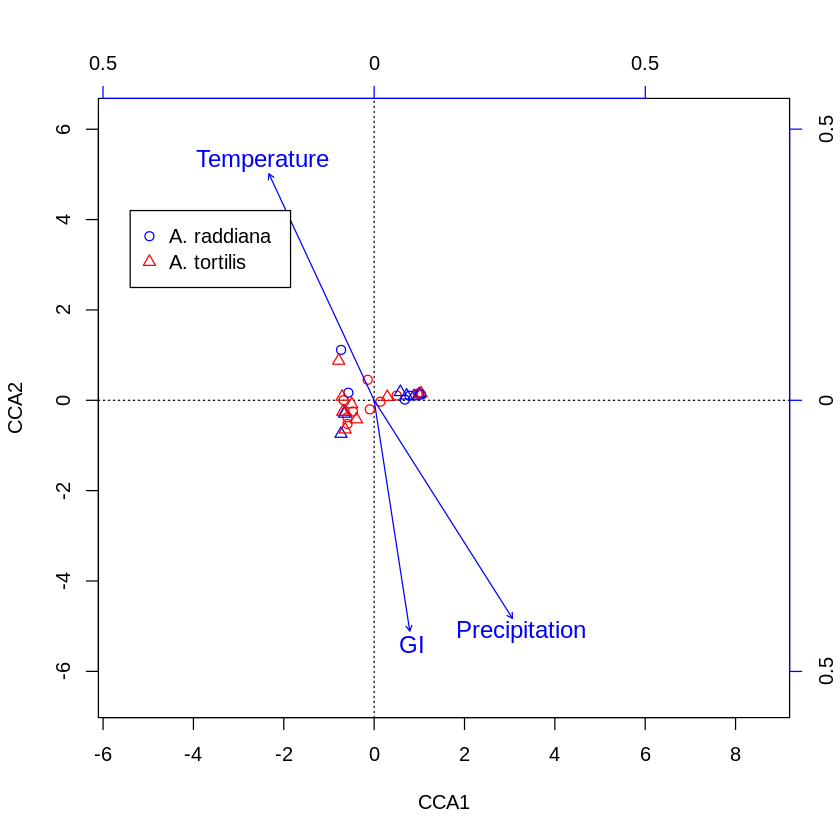

In [4]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
t_otus<-decostand(t_otus,method="total")



map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$INC=="core_all",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")


p<-p[p$sample_type=="Endophytes",]
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]
ppp<-pp[,!!colSums(pp)]

NMDS_bray<-metaMDS(ppp,distance="bray",k=2,trymax=10000,autotransform=F)

l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$tree_species)
zz<-scores(NMDS_bray,display="site")

l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$shedding,strata=p$sample_type)
l


colfunc<-colorRampPalette(c("blue", "red"))
#pdf("CCA_endo.pdf")
ab<-cca(ppp~VPD+Humidity+Precipitation+Temperature+GI+RI,p)
plot(ab,type="n",scaling=1)
with(ppp,points(ab,display="sites",col="gray",pch=3,lwd=0.1,scaling=1))
with(ppp,points(ab,col=colfunc(2)[p$tree_species],display="sites",scaling=1,pch=unique(as.numeric(p$tree_species))))

fit<-envfit(ab~VPD+Humidity+Precipitation+Temperature+GI+RI,p,strata=p$tree_species)


plot(fit, cex=1.2, axis=TRUE,p.max=0.05)
#text(ab, display="bp",scaling=1)
legend(x=-5.4,y=4.2,legend=unique(p$tree_species),col=colfunc(2)[unique(p$tree_species)],pch=unique(as.numeric(p$tree_species)))
#legend(x=-6.4,y=4.2,legend=unique(p_endo$Species),pch=unique(as.numeric(p_endo$Species)))

#dev.off()
fit

# Epiphytes vs Endophytes

In [5]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu<-otu[,1:(dim(otu)[2]-7)]
otu<- as.data.frame(t(otu))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map<-map[map$Face=="South",]
write.table(map,"map.txt",sep="\t",quote=FALSE)
map<-read.table("map.txt",header=T,row.names=1,sep="\t")

x<-subset(otu[rownames(map),])
x_bind<-cbind(map,x)
write.table(x_bind,"c.txt",sep="\t",quote=FALSE)
x_bind<-read.table("c.txt",header=T,row.names=1,sep="\t")
x<-x_bind[,((dim(map)[2])+1):dim(x_bind)[2]]
x<-x[,!!colSums(x)]

l_Epi_endo<-anosim((as.matrix((vegdist(x,distance="bray")))),grouping=x_bind$Endo_exo,permutation=999, distance="bray",strata=x_bind$Species)
x<-decostand(x,method="total")
x<-(as.matrix((vegdist(x,distance="bray", binary=F,upper=F,na.rm=T))))
adonis2(x~x_bind$Endo_exo,permutations=999,method="bray",starta=x_bind$Species)


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
x_bind$Endo_exo,1,4.47758,0.2555588,21.97053,0.001
Residual,64,13.04316,0.7444412,NA,NA
Total,65,17.52074,1.0000000,NA,NA


# Figure 2

## original Figure 2A

Run 0 stress 0.1401873 
Run 1 stress 0.1410139 
Run 2 stress 0.1424848 
Run 3 stress 0.1425019 
Run 4 stress 0.1511126 
Run 5 stress 0.1440128 
Run 6 stress 0.1540444 
Run 7 stress 0.1476537 
Run 8 stress 0.141026 
Run 9 stress 0.1468354 
Run 10 stress 0.1506955 
Run 11 stress 0.1869094 
Run 12 stress 0.1900982 
Run 13 stress 0.2408211 
Run 14 stress 0.1686414 
Run 15 stress 0.1437064 
Run 16 stress 0.1468219 
Run 17 stress 0.1422512 
Run 18 stress 0.1440036 
Run 19 stress 0.146421 
Run 20 stress 0.1472477 
Run 21 stress 0.142718 
Run 22 stress 0.1414458 
Run 23 stress 0.2355594 
Run 24 stress 0.1487067 
Run 25 stress 0.2061767 
Run 26 stress 0.1980223 
Run 27 stress 0.4075377 
Run 28 stress 0.1491578 
Run 29 stress 0.1436011 
Run 30 stress 0.1549733 
Run 31 stress 0.2370984 
Run 32 stress 0.1451752 
Run 33 stress 0.1445161 
Run 34 stress 0.1452283 
Run 35 stress 0.1463187 
Run 36 stress 0.1401871 
... New best solution
... Procrustes: rmse 0.001205866  max resid 0.00917486 
... Simila

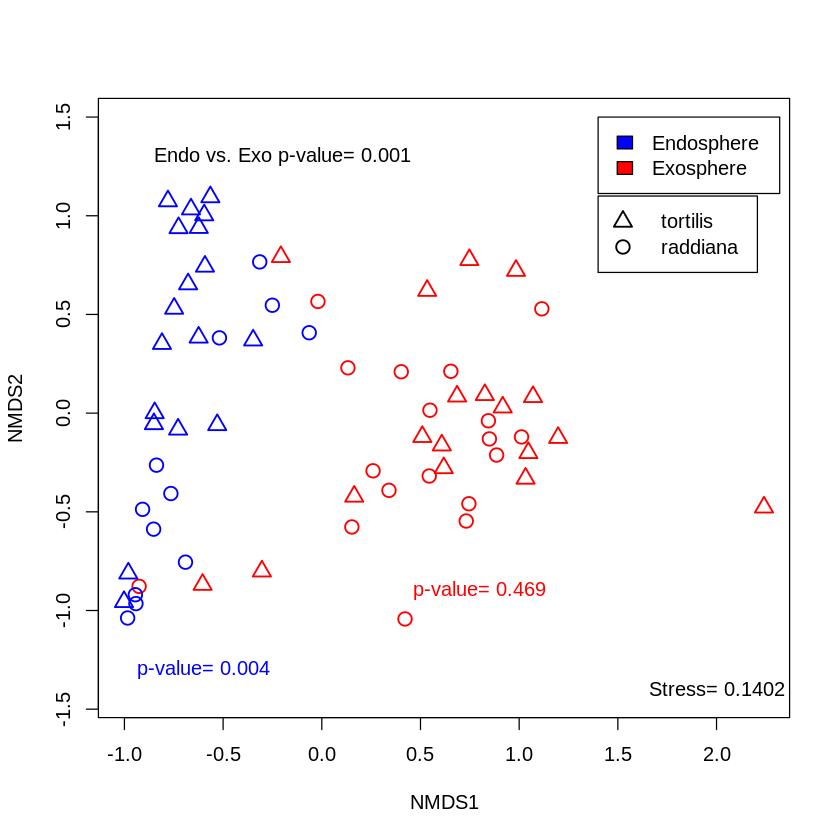

In [6]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))

map<-read.table("F649_R889_map_r2_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$INC=="core_all",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")

p<-p[p$Face=="South",]
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]
ppp<-pp[,!!colSums(pp)]
ppp<-decostand(ppp,method="total")

NMDS_bray<-metaMDS(ppp,distance="bray",k=2,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")

l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$Endo_exo)

p_exo<-p[p$Endo_exo=="Exosphere",]
write.table(p_exo,"p.txt",sep="\t",quote=FALSE)
p_exo<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp_exo<-p_exo[,((dim(map2)[2])+1):dim(p_exo)[2]]
ppp_exo<-pp_exo[,!!colSums(pp_exo)]
l_exo<-anosim((as.matrix((vegdist(ppp_exo,distance="bray")))),grouping=p_exo$Species)

p_endo<-p[p$Endo_exo=="Endosphere",]
write.table(p_endo,"p.txt",sep="\t",quote=FALSE)
p_endo<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp_endo<-p_endo[,((dim(map2)[2])+1):dim(p_endo)[2]]
ppp_endo<-pp_endo[,!!colSums(pp_endo)]
l_endo<-anosim((as.matrix((vegdist(ppp_endo,distance="bray")))),grouping=p_endo$Species)

colfunc<-colorRampPalette(c("blue", "red"))
#pdf("Figure 2A_Endo_Exo.pdf")
plot(NMDS_bray,dis="site",type="n")
points(NMDS_bray,col=colfunc(2)[p$Endo_exo],pch=as.numeric(p$Species),cex=1.5,lwd=1.5)
legend(x=1.4,y=1.5,legend=unique(p$Endo_exo),fill=colfunc(2)[unique(p$Endo_exo)])
legend(x=1.4,y=1.1,legend=unique(p$Species),pch=unique(as.numeric(p$Species)),pt.cex=1.5,lwd=1.5,lty=NA)
text(y=-1.4,x=2,label=paste("Stress=",round(NMDS_bray$stress,digits=4)))
text(y=1.3,x=-0.2,label=paste("Endo vs. Exo p-value=",l$signif))
text(y=-1.3,x=-0.6,label=paste("p-value=",l_endo$signif),col="blue")
text(y=-0.9,x=0.8,label=paste("p-value=",l_exo$signif),col="red")
#dev.off()

### original Figure 2B


Call:
anosim(x = (as.matrix((vegdist(ppp, distance = "bray")))), grouping = p$tree_species) 
Dissimilarity: user supplied square matrix 

ANOSIM statistic R: 0.2364 
      Significance: 0.005 

Permutation: free
Number of permutations: 999


Run 0 stress 0.0795147 
Run 1 stress 0.08044304 
Run 2 stress 0.1437831 
Run 3 stress 0.0795147 
... New best solution
... Procrustes: rmse 4.636797e-06  max resid 1.455336e-05 
... Similar to previous best
Run 4 stress 0.0795147 
... New best solution
... Procrustes: rmse 1.724381e-06  max resid 6.150093e-06 
... Similar to previous best
Run 5 stress 0.1441563 
Run 6 stress 0.0795147 
... Procrustes: rmse 2.899602e-06  max resid 1.09923e-05 
... Similar to previous best
Run 7 stress 0.0795147 
... Procrustes: rmse 6.130992e-06  max resid 2.190799e-05 
... Similar to previous best
Run 8 stress 0.0795147 
... Procrustes: rmse 2.003973e-06  max resid 7.287276e-06 
... Similar to previous best
Run 9 stress 0.1579662 
Run 10 stress 0.0795147 
... Procrustes: rmse 1.762321e-06  max resid 5.161376e-06 
... Similar to previous best
Run 11 stress 0.134845 
Run 12 stress 0.1494173 
Run 13 stress 0.0795147 
... Procrustes: rmse 7.762116e-06  max resid 2.676239e-05 
... Similar to previous best
R

[1] 0.005

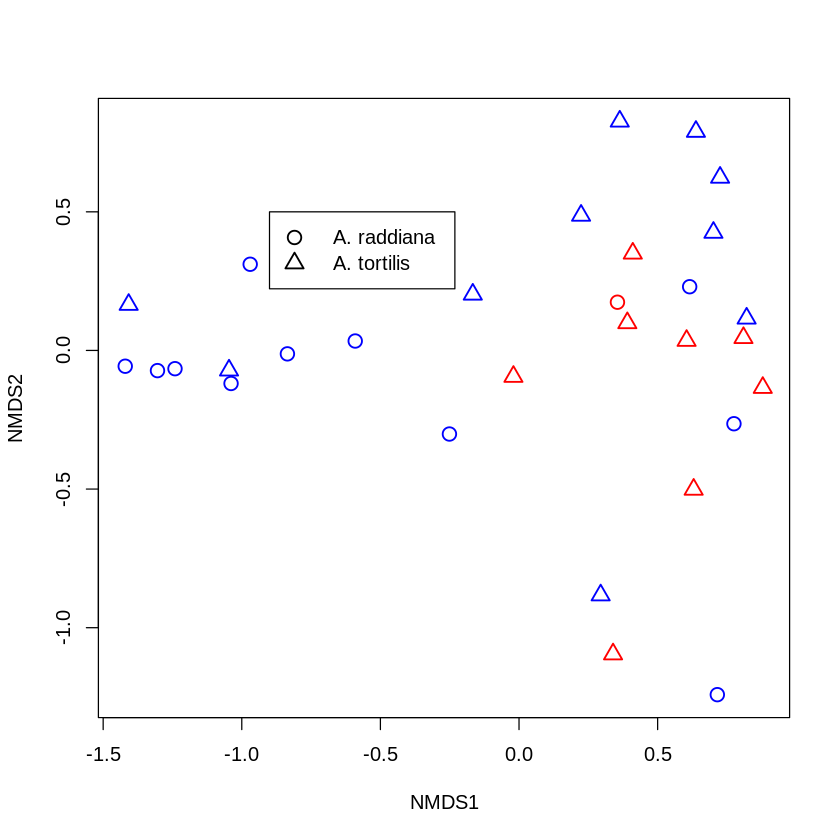

In [7]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))

map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$Canopy=="South",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")


p<-p[p$sample_type=="Endophytes",]
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]
ppp<-pp[,!!colSums(pp)]

l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$tree_species)
l
NMDS_bray<-metaMDS(ppp,distance="bray",k=2,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")

colfunc<-colorRampPalette(c("blue", "red"))

#pdf("Figure 2B_Endo.pdf")
 plot(NMDS_bray,dis="site",type="n")
 points(NMDS_bray,pch=as.numeric(p$tree_species),cex=1.5,lwd=1.5, col=colfunc(2)[p$shedding])
legend(x=-0.9,y=0.5,legend=unique(p$tree_species),pch=unique(as.numeric(p$tree_species)),pt.cex=1.5,lwd=1.5,lty=NA)
text(y=1,x=1,label=paste("Stress=",round(NMDS_bray$stress,digits=4)))
text(y=1,x=1,label=paste("p-value=",l$signif))
#dev.off()
l$signif

# Figure 3

Using l, sp as id variables

Warning message in Ops.factor(x$l):
“‘-’ not meaningful for factors”


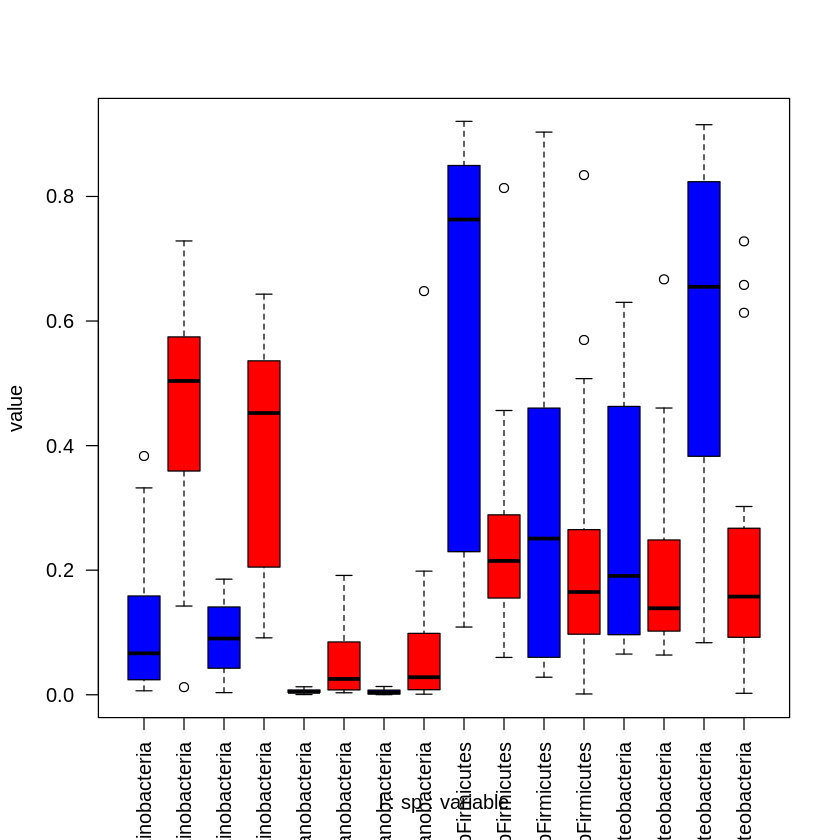

In [9]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
rownames(otu)<-paste(otu$Phylum,row.names(otu),sep="_")
otu<-aggregate(otu[,1:(dim(otu)[2]-7)],by=list(otu$Phylum),FUN=sum)
rownames(otu)<-otu[,1]
otu<-otu[,-1]
otu<-otu[-1,]
otu<-decostand(t(otu),method="total")

map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$Canopy=="South",]
x<-subset(otu[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
p<-cbind(p$tree_species,p$sample_type, p[,((dim(map2)[2])+1):dim(p)[2]])                               
#p<-p[,-c(1:14,16:21,23:32)]

pp<-p[,-1]
pp<-pp[,-1]

xx <- pp[,colSums(pp) > 0.7]
l<-p[,2]
sp<-p[,1]
x<-cbind(l,sp,xx)
x<-melt(x)
x<-x[order(-x$l),]
x<-x[order(x$sp),]
write.table(x,"x.txt",sep="\t",quote=FALSE)
x<-read.table("x.txt",header=T,row.names=1,sep="\t")

colfunc<-colorRampPalette(c("blue", "red"))

#pdf("Figure3.pdf")
boxplot(value~l*sp*variable,data=x,las=2,col=(c("blue","red")))
#dev.off()



[1] pActinobacteria pCyanobacteria  pFirmicutes     pProteobacteria
Levels: pActinobacteria pCyanobacteria pFirmicutes pProteobacteria

`summarise()` ungrouping output (override with `.groups` argument)



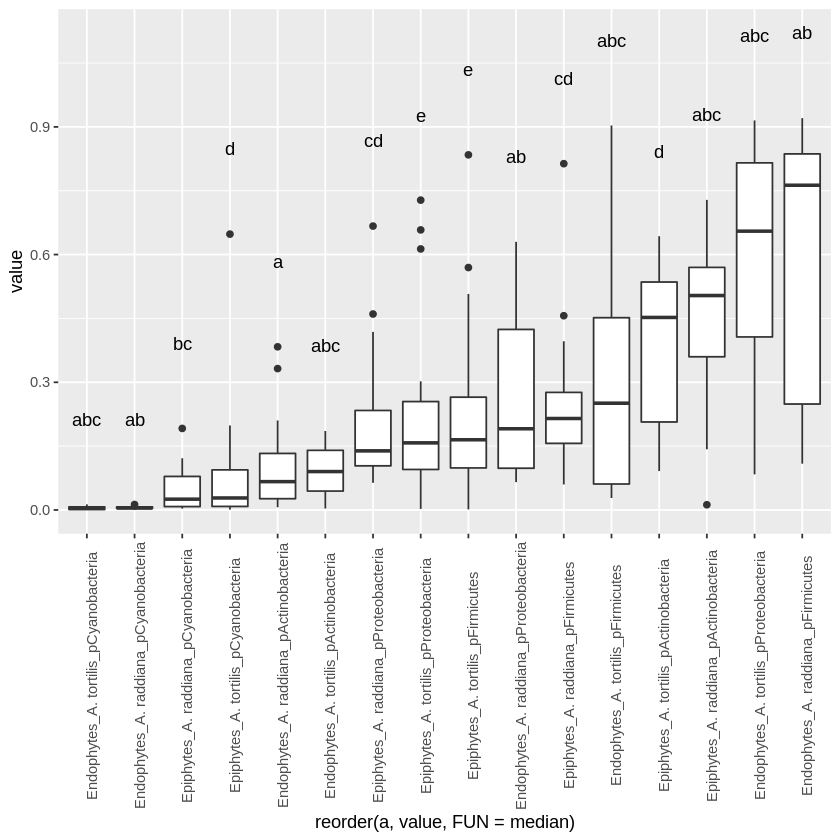

In [12]:
unique(x$variable)
a<-paste(x$l, x$sp,x$variable,sep="_")
xx<-cbind (a,x)
v<-log(xx$value)
xx<-cbind (xx,v)
x.summarized = xx %>% group_by(a) %>% summarize(Max.value=max(value))
hsd=HSD.test(aov(v~a,data=xx), "a", group=T)
hsd2=HSD.test(aov(value~a,data=xx), "a", group=T)

 #pdf("tuky.pdf")
 ggplot(xx,aes(x=reorder(a,value,FUN = median),y=value)) +theme(axis.text.x = element_text(angle = 90))+ geom_boxplot() + geom_text(data=x.summarized,aes(x=a,y=0.2+Max.value,label=hsd$groups$groups))
# dev.off()

## Suplementary Figure 2 and 3

In [20]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)

otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))

map<-read.table("F649_R889_map_r2_MS2.csv",row.names=1,sep=",",header=T)
map2<-map[map$INC=="core_all",]

x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
rownames(p)<-p$Description
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]

Observed<-rowSums(pp != 0)
Chao1=estimateR(pp)[2,]
Shannon<-diversity(pp, index="shannon")
Simpson<-diversity(pp, index="simpson")

map3<-cbind(Chao1,Observed,Shannon,Simpson,map2)
mapt<-map3[map3$tree_species=="T" & map3$Canopy=="S",]
mapr<-map3[map3$tree_species=="R" & map3$Canopy=="S",]

## Supplementary Figure 2

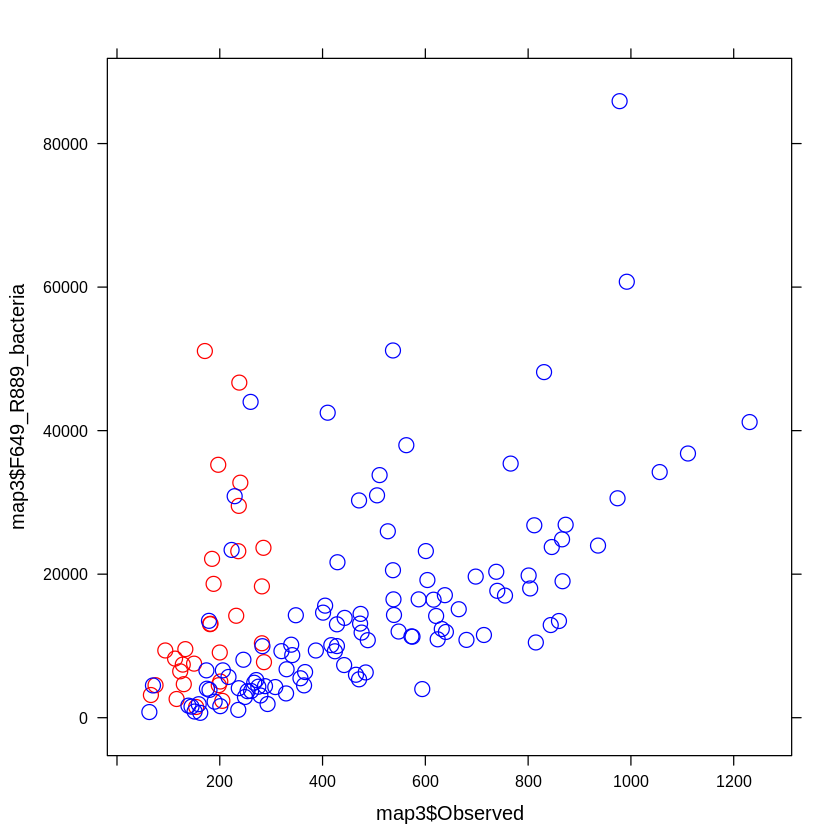

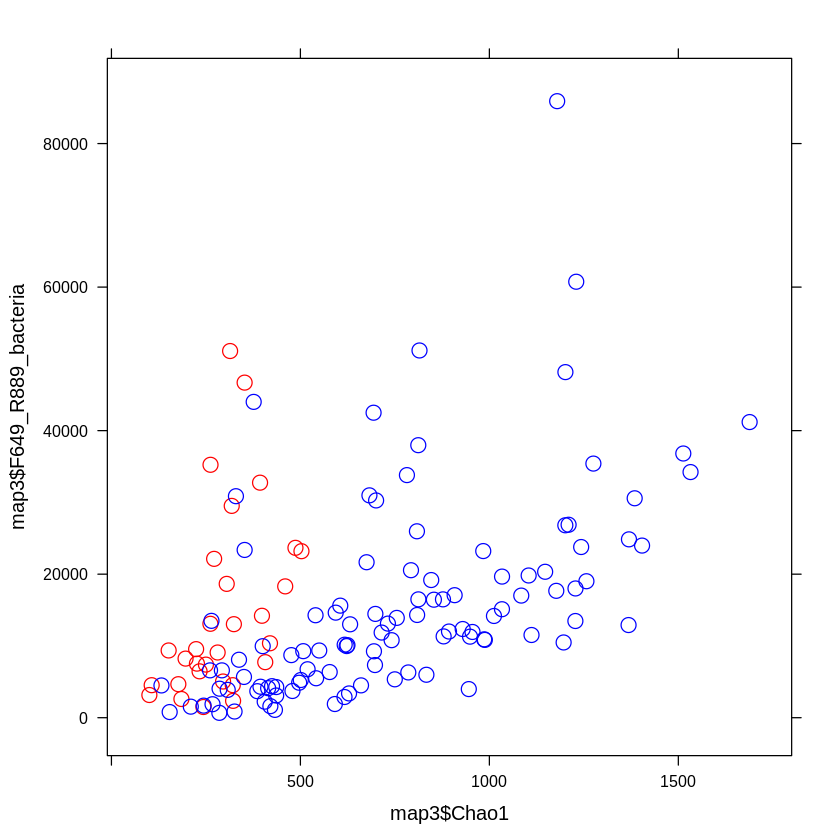

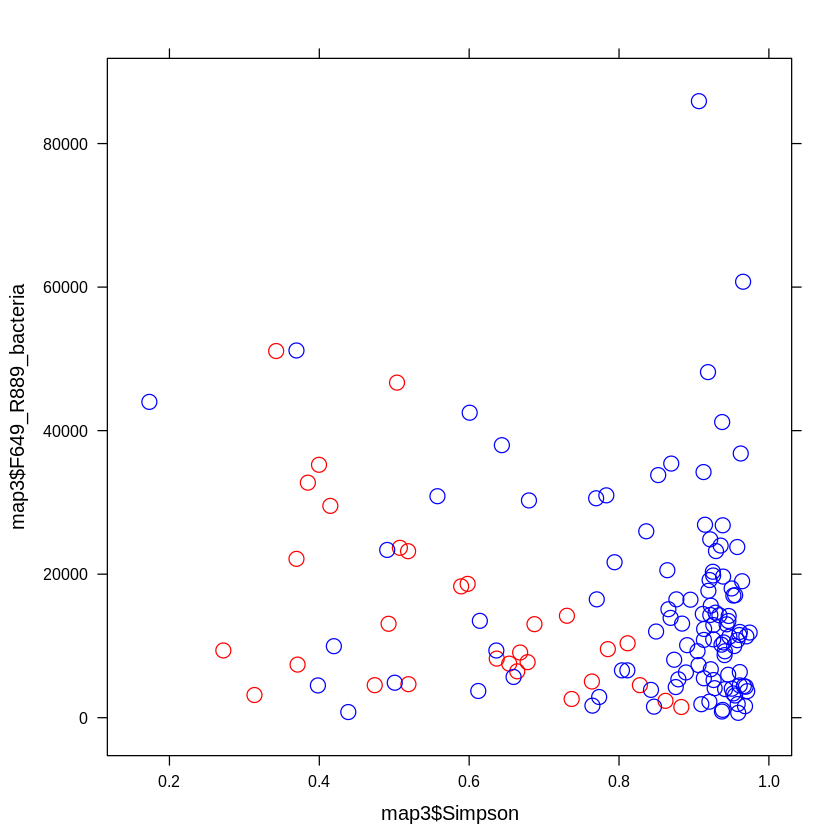

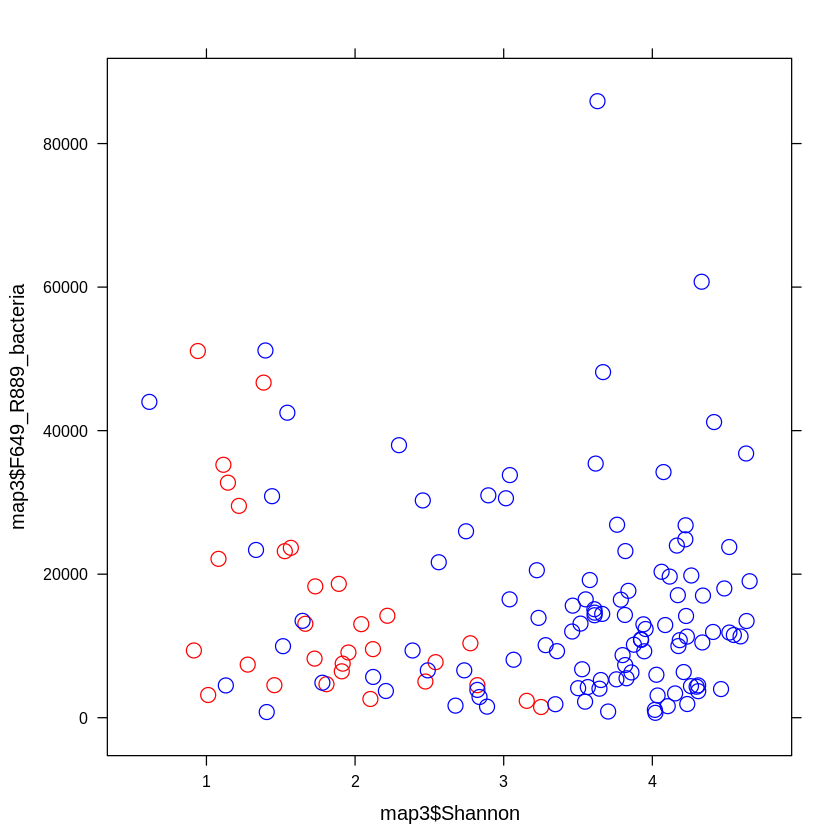

In [21]:
xyplot(map3$F649_R889_bacteria~ map3$Observed,group=map3$Epi_Endo, col=c("red","blue"),cex=1.5)
xyplot(map3$F649_R889_bacteria~ map3$Chao1,group=map3$Epi_Endo, col=c("red","blue"),cex=1.5)
xyplot(map3$F649_R889_bacteria~ map3$Simpson,group=map3$Epi_Endo, col=c("red","blue"),cex=1.5)
xyplot(map3$F649_R889_bacteria~ map3$Shannon,group=map3$Epi_Endo, col=c("red","blue"),cex=1.5)


## Suplementary Figure 3


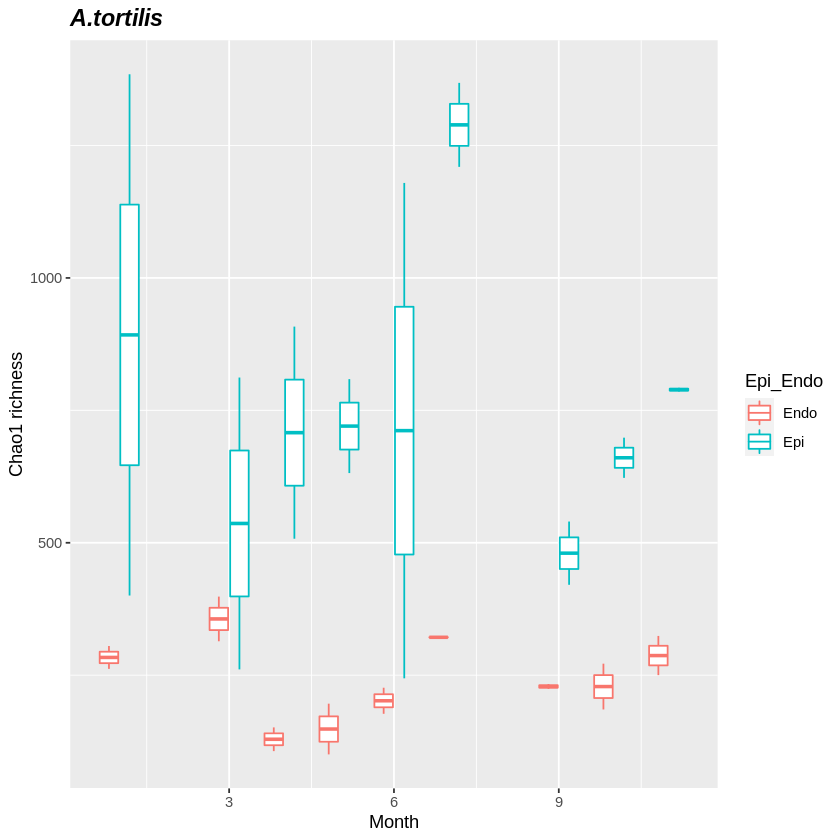

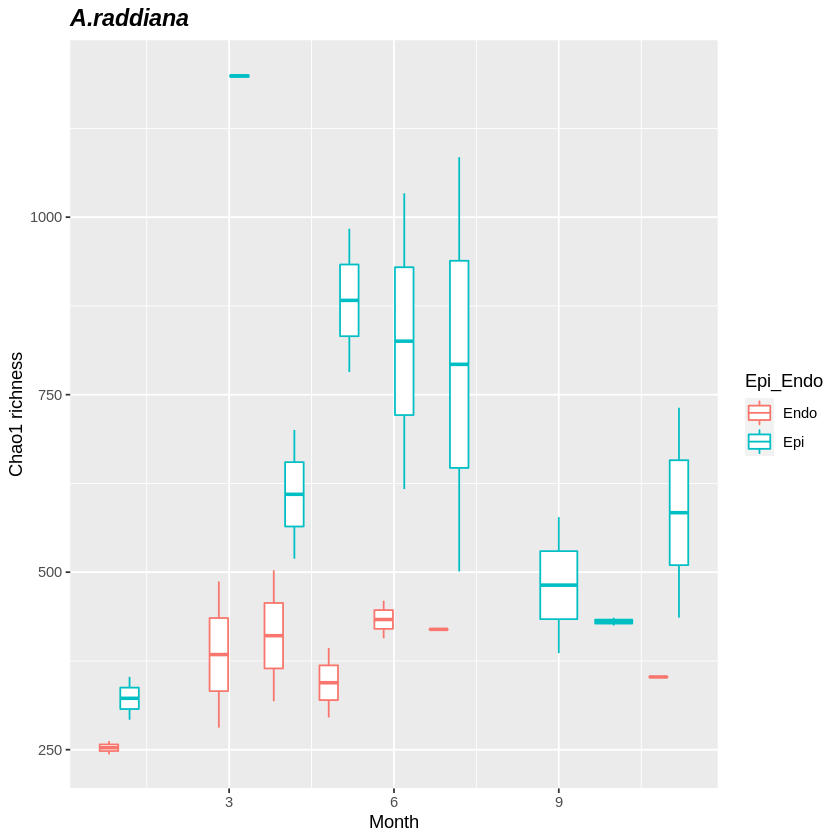

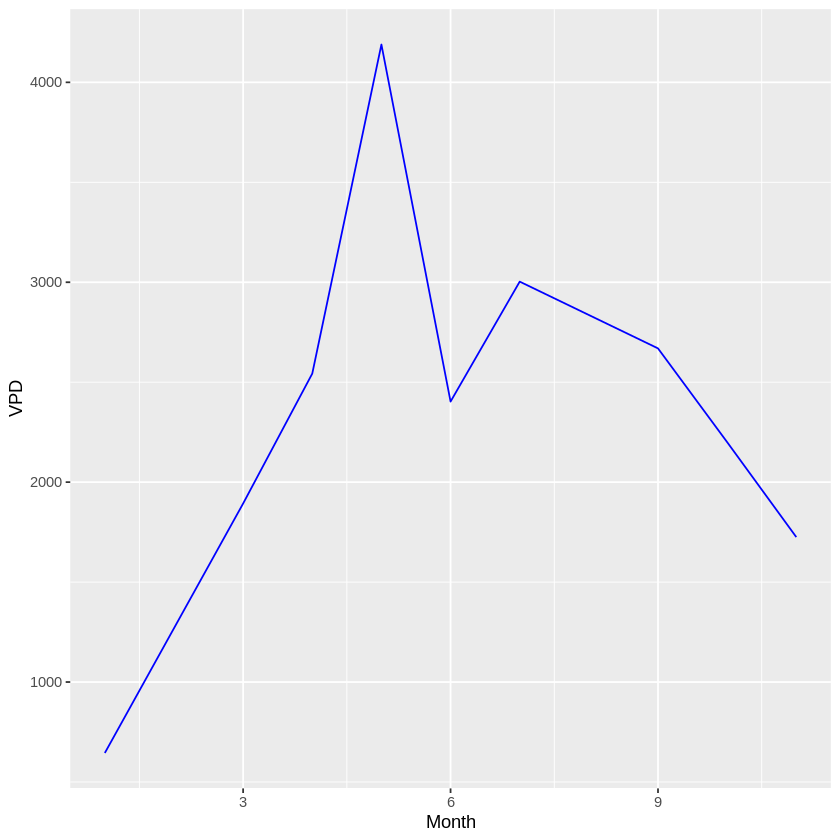

In [22]:
#pdf("supp_Fig_3.pdf")
ggplot(mapt, aes(x = Month, y = Chao1,colour=Epi_Endo)) + 
ggtitle("A.tortilis") +
theme(plot.title = element_text(color="black", size=14, face="bold.italic")) +
ylab("Chao1 richness") +
geom_boxplot(data = mapt,  aes(group = interaction(Month, Epi_Endo)))
              
ggplot(mapr, aes(x = Month, y =Chao1,colour=Epi_Endo)) + 
ggtitle("A.raddiana") +
theme(plot.title = element_text(color="black", size=14, face="bold.italic")) +
ylab("Chao1 richness") +
geom_boxplot(data = mapr,  aes(group = interaction(Month, Epi_Endo)))

ggplot(mapr, aes(x = Month, y = VPD)) + geom_line(color = "blue")
#dev.off()

### Supplementary Table 4.

In [39]:
xx<-map3[,c(1:4,15,24,27,19)]
average <- aggregate(.~tree_species+month+Epi_Endo, xx, function(x) c(mean = mean(x)))
# write.table(average,"average.txt",sep="\t",quote=FALSE)
average
# stdev<-aggregate(.~month+Epi_Endo, xx, function(x) c(sd = sd(x)))  
# #stdev

tree_species,month,Epi_Endo,Chao1,Observed,Shannon,Simpson,F649_R889_PD
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R,April,Endo,410.5630,236.5000,1.372845,0.4665923,10.465145
T,April,Endo,128.9500,84.5000,1.186355,0.3729509,5.988295
R,Jan,Endo,252.7708,175.5000,2.182781,0.6413701,9.420840
T,Jan,Endo,283.4575,185.0000,1.777925,0.5452262,10.116790
R,July,Endo,419.5000,282.0000,2.775805,0.8114851,14.827600
T,July,Endo,321.4531,201.5000,2.988938,0.8449524,12.328375
R,June,Endo,433.3891,284.0000,2.137036,0.6336330,13.825475
T,June,Endo,201.6477,140.0000,1.862233,0.5862214,8.364310
R,March,Endo,383.9744,242.5000,1.761603,0.5877824,11.873375


# phyloseq

In [41]:
x<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
sampledata<-x[x$INC=="core_all",]
sampledata<-as.matrix(sampledata)
sampledata=sample_data(data.frame(sampledata,row.names=rownames(sampledata)))

In [42]:
otumat<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otumat<-otumat[,1:(dim(otumat)[2]-7)]
otumat<-t(otumat)
otumat<-subset(t(otumat[rownames(sampledata),]))

otumat<-(otumat)
otumat<-as.matrix(otumat)
OTU = otu_table(otumat, taxa_are_rows = TRUE)


In [43]:
taxmat<-read.table("core_all_R.txt",header=T,sep="\t",fill=NA,row.names=1)
taxmat<-taxmat[,(dim(taxmat)[2]-6):dim(taxmat)[2]]
taxmat<-subset(taxmat[rownames(otumat),])
taxmat<-as.matrix(taxmat)
TAX = tax_table(taxmat)

In [44]:
physeq = phyloseq(OTU, TAX,sampledata)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4873 taxa and 137 samples ]
sample_data() Sample Data:       [ 137 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 4873 taxa by 7 taxonomic ranks ]

In [45]:
ntaxa(physeq)
physeq <- subset_taxa(physeq, (Kingdome=="kBacteria"))
ntaxa(physeq)
physeq <- subset_taxa(physeq, (Order!="Chloroplast") | is.na(Order))
ntaxa(physeq)

[1] 4873

[1] 4873

[1] 4873

In [46]:
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4873 taxa and 137 samples ]
sample_data() Sample Data:       [ 137 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 4873 taxa by 7 taxonomic ranks ]

## Figure 2

In [47]:
summary(sample_data(physeq)$sample_type)
physeq_epi_endo <- subset_samples(physeq, Canopy=="South")
summary(sample_data(physeq_epi_endo)$sample_type)

Endophytes  Epiphytes 
        30        107

Endophytes  Epiphytes 
        30         36

In [48]:
physeq_epi_endo1 = subset_samples(physeq_epi_endo, sample_sums(physeq_epi_endo) > 1000, TRUE)
physeq_epi_endor =rarefy_even_depth(physeq_epi_endo1, sample.size = min(sample_sums(physeq_epi_endo1)),
  rngseed = FALSE, replace = TRUE, trimOTUs = TRUE, verbose = TRUE)

sampledf_epi_endor <- data.frame(sample_data(physeq_epi_endor))
adonis(distance(physeq_epi_endor, method="bray") ~ 
       sample_type*Tree,
       permutation=999,data = sampledf_epi_endor)



You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`


...

2697OTUs were removed because they are no longer 
present in any sample after random subsampling


...




Call:
adonis(formula = distance(physeq_epi_endor, method = "bray") ~      sample_type * Tree, data = sampledf_epi_endor, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                 Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
sample_type       1    4.3743  4.3743 21.3660 0.24418  0.001 ***
Tree              3    0.7127  0.2376  1.1604 0.03979  0.249    
sample_type:Tree  3    0.9527  0.3176  1.5512 0.05318  0.074 .  
Residuals        58   11.8744  0.2047         0.66285           
Total            65   17.9142                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Figure 2A

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1485711 
Run 1 stress 0.147189 
... New best solution
... Procrustes: rmse 0.02165485  max resid 0.1394975 
Run 2 stress 0.1663111 
Run 3 stress 0.1544858 
Run 4 stress 0.1492636 
Run 5 stress 0.1467219 
... New best solution
... Procrustes: rmse 0.03021164  max resid 0.1980822 
Run 6 stress 0.160994 
Run 7 stress 0.1774706 
Run 8 stress 0.1535417 
Run 9 stress 0.1640645 
Run 10 stress 0.162751 
Run 11 stress 0.142998 
... New best solution
... Procrustes: rmse 0.02002353  max resid 0.1349317 
Run 12 stress 0.1467936 
Run 13 stress 0.1515253 
Run 14 stress 0.154922 
Run 15 stress 0.1461742 
Run 16 stress 0.154344 
Run 17 stress 0.1652356 
Run 18 stress 0.1540479 
Run 19 stress 0.1615115 
Run 20 stress 0.142558 
... New best solution
... Procrustes: rmse 0.009828008  max resid 0.0737033 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


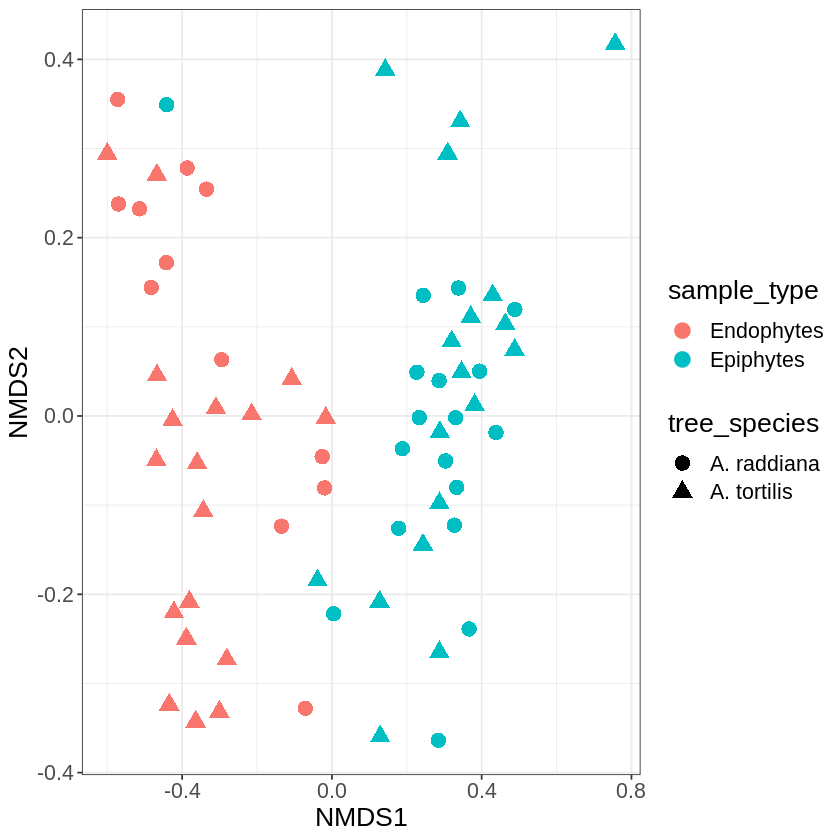

In [49]:
GP.ord <- ordinate(physeq_epi_endor, "NMDS", "bray")
#pdf('Figure 2A.pdf')
p<- plot_ordination(physeq_epi_endor, GP.ord, type="samples", color="sample_type",shape="tree_species")
p + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)
#dev.off()

In [50]:
ps1t= transform_sample_counts(physeq_epi_endor, function(x) x / sum(x) )

In [51]:
ps1tr = filter_taxa(ps1t, function(x) sum(x) < 1, TRUE)

### Supplementary Figure 8

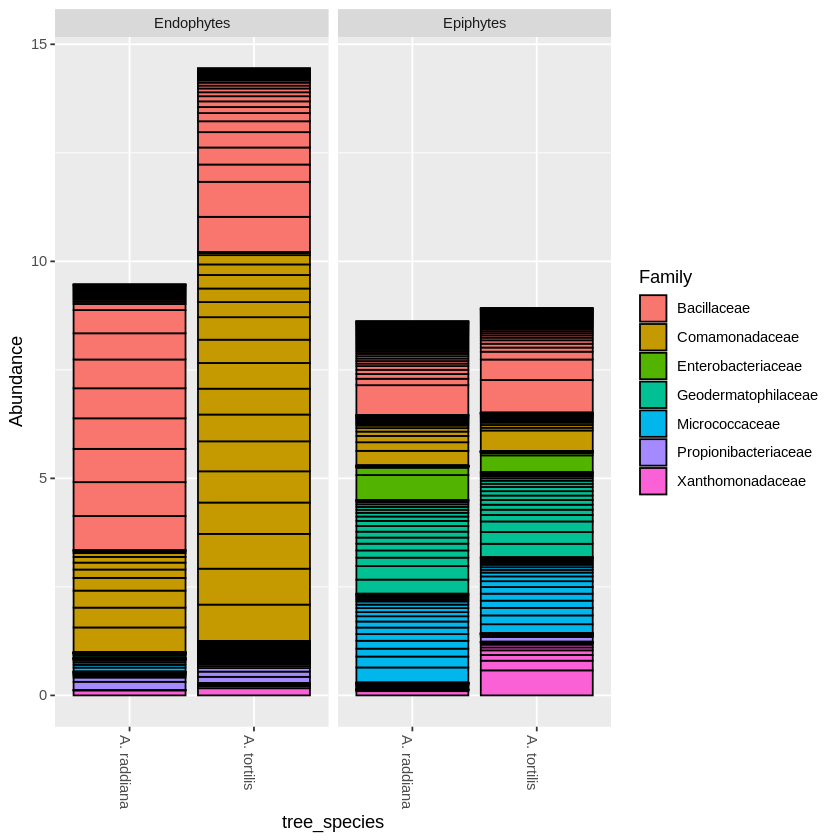

In [52]:
rmtaxa = taxa_names(ps1tr)
alltaxa = taxa_names(ps1t)
myTaxa = alltaxa[!alltaxa %in% rmtaxa]
ps2 <- prune_taxa(myTaxa,ps1t)
#pdf("Supp_Figure8.pdf")
#plot_bar(ps2, "Canopy", fill="Family", facet_grid=~Month)
plot_bar(ps2, "tree_species", fill="Family",facet_grid=~sample_type)
#dev.off()


# Table 2

In [53]:
summary(sample_data(physeq)$sample_type)
physeq_epi <- subset_samples(physeq, sample_type=="Epiphytes")
summary(sample_data(physeq_epi)$sample_type)

physeq_epi1 = subset_samples(physeq_epi, sample_sums(physeq_epi) > 1000, TRUE)
physeq_epir =rarefy_even_depth(physeq_epi1, sample.size = min(sample_sums(physeq_epi1)),
  rngseed = FALSE, replace = TRUE, trimOTUs = TRUE, verbose = TRUE)

sampledf_epir <- data.frame(sample_data(physeq_epir))


adonis(distance(physeq_epir, method="bray") ~ 
       season+month+shedding+
       month/tree_species+
       tree_species/Tree+
       tree_species/Canopy,
       permutation=999,data = sampledf_epir)

Endophytes  Epiphytes 
        30        107

Epiphytes 
      107

You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`


...

1902OTUs were removed because they are no longer 
present in any sample after random subsampling


...




Call:
adonis(formula = distance(physeq_epir, method = "bray") ~ season +      month + shedding + month/tree_species + tree_species/Tree +      tree_species/Canopy, data = sampledf_epir, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                     Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
season                3    2.4546 0.81820  4.2864 0.10096  0.001 ***
month                 5    3.3782 0.67564  3.5396 0.13895  0.001 ***
shedding              1    0.1900 0.19005  0.9956 0.00782  0.420    
tree_species          1    0.2482 0.24818  1.3002 0.01021  0.154    
month:tree_species    7    1.4958 0.21369  1.1195 0.06153  0.168    
tree_species:Tree     2    0.4688 0.23442  1.2281 0.01928  0.141    
tree_species:Canopy   4    0.8058 0.20145  1.0554 0.03314  0.300    
Residuals            80   15.2706 0.19088         0.62811           
Total               103   24.3121                 1.00000           
---
Signif. 

### Figure 4A

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1888593 
Run 1 stress 0.2021024 
Run 2 stress 0.1888569 
... New best solution
... Procrustes: rmse 0.0004024725  max resid 0.002324228 
... Similar to previous best
Run 3 stress 0.1888566 
... New best solution
... Procrustes: rmse 0.0002682233  max resid 0.001957281 
... Similar to previous best
Run 4 stress 0.2108998 
Run 5 stress 0.1953676 
Run 6 stress 0.1889553 
... Procrustes: rmse 0.002989179  max resid 0.02415992 
Run 7 stress 0.1888622 
... Procrustes: rmse 0.0008504405  max resid 0.007849858 
... Similar to previous best
Run 8 stress 0.1888574 
... Procrustes: rmse 0.0001288819  max resid 0.0007841719 
... Similar to previous best
Run 9 stress 0.1953155 
Run 10 stress 0.1966462 
Run 11 stress 0.1889566 
... Procrustes: rmse 0.003027375  max resid 0.02435392 
Run 12 stress 0.1888621 
... Procrustes: rmse 0.0008229092  max resid 0.007647745 
... Similar to previous best
Run 13 stress 0.1958923 
Run 14 s

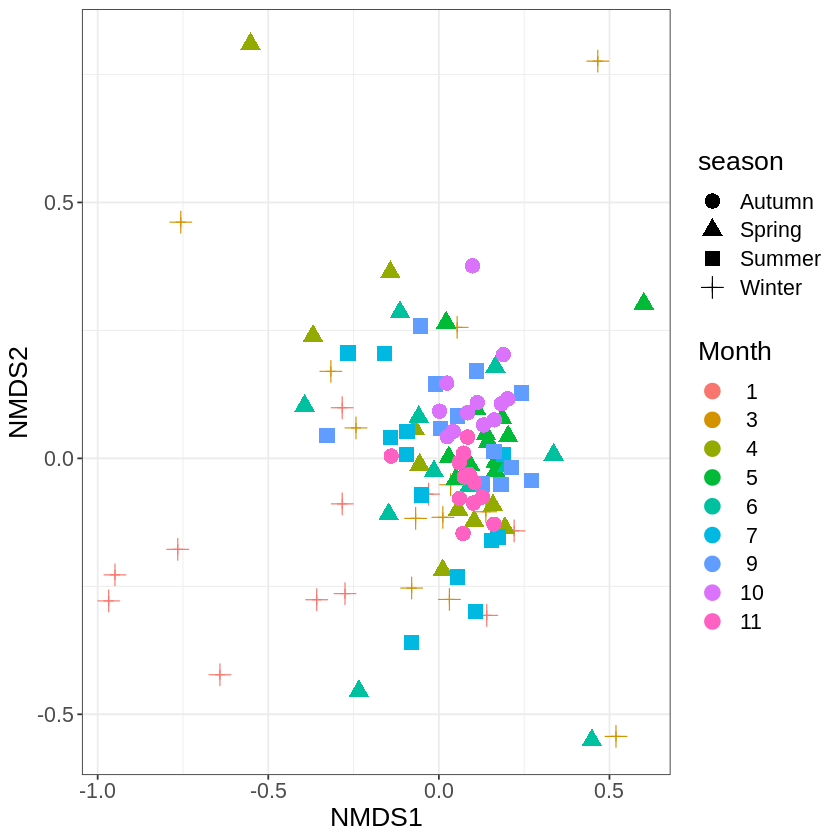

In [54]:

GP.ord <- ordinate(physeq_epir, "NMDS", "bray")
#pdf('Figure4A.pdf')
p<- plot_ordination(physeq_epir, GP.ord, type="samples", color="Month",shape="season")
p + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)
#dev.off()


### Supplementary Figure 4B

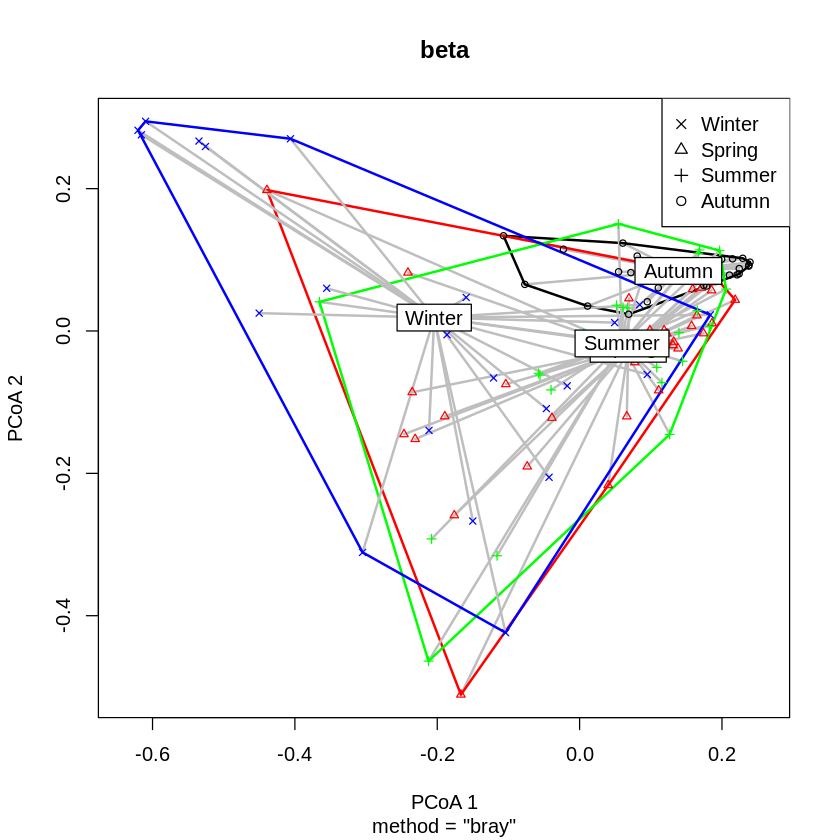

In [55]:
colfunc<-colorRampPalette(c("blue", "red","green","black"))

erie_bray <- phyloseq::distance(physeq_epir, method = "bray")
beta <- betadisper(erie_bray, sampledf_epir$season)
#pdf("epiphytes_season.pdf")

plot(beta,col=unique(colfunc(4)[(sampledf_epir$season)]),lwd=2)
legend("topright",legend=unique(sampledf_epir$season),pch=as.numeric(unique(sampledf_epir$season)))
#dev.off()



In [56]:
permutest(beta, pairwise = TRUE, permutations = 999)


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq  Mean Sq      F N.Perm Pr(>F)    
Groups      3 0.30577 0.101925 7.7517    999  0.001 ***
Residuals 100 1.31487 0.013149                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           Autumn     Spring     Summer Winter
Autumn            1.4000e-02 1.0000e-03  0.001
Spring 1.1614e-02            8.1700e-01  0.062
Summer 8.2058e-04 8.2378e-01             0.012
Winter 1.1800e-07 5.6897e-02 8.1461e-03       

### Supplementary Figure 4A

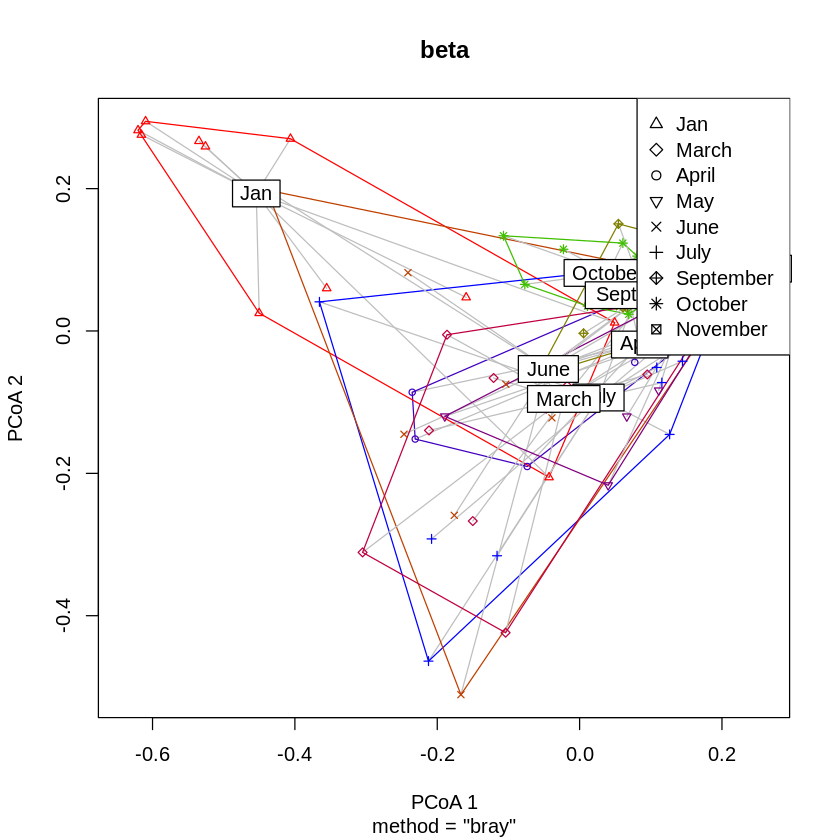

In [57]:
colfunc<-colorRampPalette(c("blue", "red","green"))

erie_bray <- phyloseq::distance(physeq_epir, method = "bray")
beta <- betadisper(erie_bray,sampledf_epir$month)
#pdf("epiphytes_month.pdf")
plot(beta,col=unique(colfunc(9)[(sampledf_epir$month)]))
legend("topright",legend=unique(sampledf_epir$month),pch=as.numeric(unique(sampledf_epir$month)))
#dev.off()



In [58]:
permutest(beta, pairwise = TRUE, permutations = 999)


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq  Mean Sq      F N.Perm Pr(>F)   
Groups     8 0.47465 0.059331 3.6589    999  0.003 **
Residuals 95 1.54049 0.016216                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
               April        Jan       July       June      March        May
April                7.5800e-01 8.3100e-01 4.9800e-01 3.0000e-01 5.2600e-01
Jan       7.4684e-01            5.2600e-01 2.8700e-01 1.3200e-01 8.0800e-01
July      8.2267e-01 5.1641e-01            4.5500e-01 2.2800e-01 2.5300e-01
June      4.8288e-01 2.7182e-01 4.7653e-01            5.8400e-01 1.0200e-01
March     2.6448e-01 1.3516e-01 2.1516e-01 5.5730e-01            4.6000e-02
May       5.2457e-01 7.7973e-01 2.6172e-01 1.1014e-01 4.8241e-02           
November  1.2102e-02

In [59]:
ps1t= transform_sample_counts(physeq_epir, function(x) x / sum(x) )

In [60]:
ps1t


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2971 taxa and 104 samples ]
sample_data() Sample Data:       [ 104 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 2971 taxa by 7 taxonomic ranks ]

In [61]:
ps1tr = filter_taxa(ps1t, function(x) sum(x) < 1, TRUE)

### Supplementary Figure 5

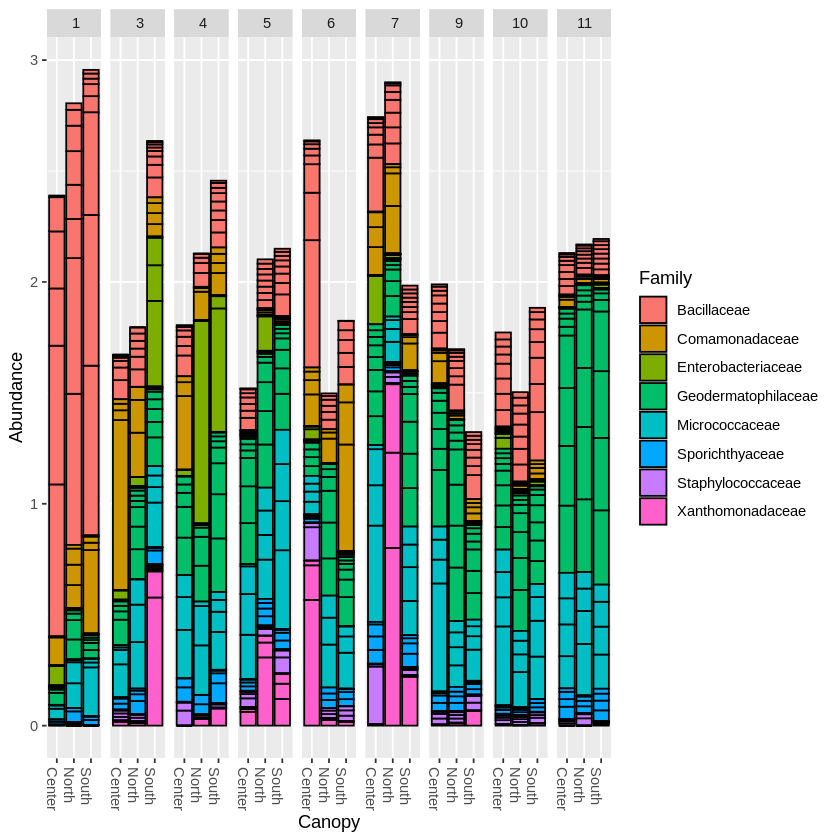

In [62]:
rmtaxa = taxa_names(ps1tr)
alltaxa = taxa_names(ps1t)
myTaxa = alltaxa[!alltaxa %in% rmtaxa]
ps2 <- prune_taxa(myTaxa,ps1t)
#pdf("Supp_Figure5.pdf")
plot_bar(ps2, "Canopy", fill="Family", facet_grid=~Month)
#dev.off()


# Table 3

In [63]:
summary(sample_data(physeq)$sample_type)
physeq_endo <- subset_samples(physeq, sample_type=="Endophytes")
summary(sample_data(physeq_endo)$sample_type)


Endophytes  Epiphytes 
        30        107

Endophytes 
        30

In [64]:
physeq_endo1 = subset_samples(physeq_endo, sample_sums(physeq_endo) > 1000, TRUE)
summary(sample_data(physeq_endo1)$sample_type)

physeq_endor =rarefy_even_depth(physeq_endo1, sample.size = min(sample_sums(physeq_endo1)),
  rngseed = FALSE, replace = TRUE, trimOTUs = TRUE, verbose = TRUE)

sampledf_endor <- data.frame(sample_data(physeq_endor))

# adonis(distance(physeq_endor, method="bray") ~ 
#        shedding+tree_species+season+month+
#        tree_species/season+tree_species/month,
#        permutation=999,data = sampledf_endor)


adonis(distance(physeq_endor, method="bray") ~ 
       shedding+tree_species+season+month+
       tree_species/Tree+
       season/tree_species+
       month/tree_species,
       permutation=999,data = sampledf_endor)



Endophytes 
        30

You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`


...

4142OTUs were removed because they are no longer 
present in any sample after random subsampling


...




Call:
adonis(formula = distance(physeq_endor, method = "bray") ~ shedding +      tree_species + season + month + tree_species/Tree + season/tree_species +      month/tree_species, data = sampledf_endor, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                    Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)  
shedding             1    0.5225 0.52245  3.8005 0.09962  0.044 *
tree_species         1    0.6207 0.62068  4.5151 0.11835  0.027 *
season               3    0.4347 0.14491  1.0542 0.08289  0.394  
month                5    1.0398 0.20796  1.5128 0.19827  0.202  
tree_species:Tree    2    0.1845 0.09225  0.6711 0.03518  0.578  
tree_species:season  3    0.5857 0.19525  1.4203 0.11168  0.243  
tree_species:month   2    0.2070 0.10352  0.7531 0.03948  0.522  
Residuals           12    1.6496 0.13747         0.31454         
Total               29    5.2446                 1.00000         
---
Signif. codes:  0 ‘**

### Figure 4B

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1711468 
Run 1 stress 0.1707563 
... New best solution
... Procrustes: rmse 0.01416826  max resid 0.0594971 
Run 2 stress 0.1710568 
... Procrustes: rmse 0.009037188  max resid 0.03587354 
Run 3 stress 0.2049981 
Run 4 stress 0.1710567 
... Procrustes: rmse 0.02996015  max resid 0.1294349 
Run 5 stress 0.2138658 
Run 6 stress 0.1710905 
... Procrustes: rmse 0.009901917  max resid 0.03646219 
Run 7 stress 0.2369741 
Run 8 stress 0.1707575 
... Procrustes: rmse 0.0002541538  max resid 0.0009724712 
... Similar to previous best
Run 9 stress 0.217223 
Run 10 stress 0.1707559 
... New best solution
... Procrustes: rmse 0.0003358475  max resid 0.001230447 
... Similar to previous best
Run 11 stress 0.1705629 
... New best solution
... Procrustes: rmse 0.02933846  max resid 0.1311764 
Run 12 stress 0.1710572 
... Procrustes: rmse 0.03213278  max resid 0.133055 
Run 13 stress 0.1710567 
... Procrustes: rmse 0.01227107  

png 
  2

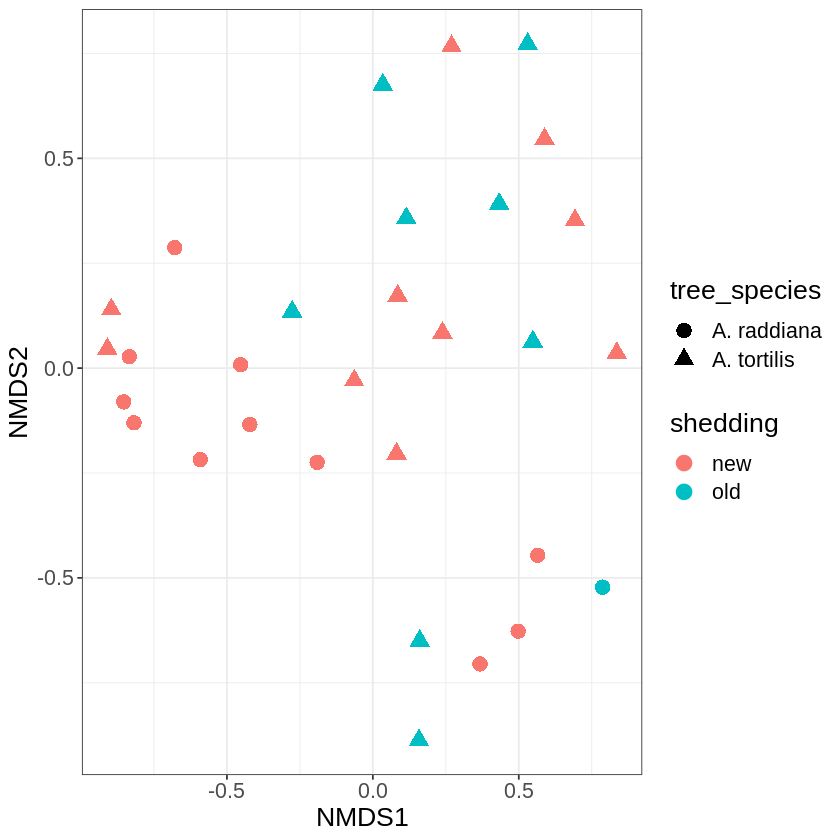

In [65]:
GP.ord <- ordinate(physeq_endor, "NMDS", "bray")
pdf('Figure 2B.pdf')
p<- plot_ordination(physeq_endor, GP.ord, type="samples", color="tree_species",shape="tree_species")
p + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)
dev.off()


#pdf('Figure4B.pdf')
p<- plot_ordination(physeq_endor, GP.ord, type="samples", color="shedding",shape="tree_species")
p + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)
#dev.off()



### Figure 2B

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1711468 
Run 1 stress 0.2223558 
Run 2 stress 0.1705662 
... New best solution
... Procrustes: rmse 0.01951443  max resid 0.07543603 
Run 3 stress 0.1705665 
... Procrustes: rmse 6.521777e-05  max resid 0.000122301 
... Similar to previous best
Run 4 stress 0.1710567 
... Procrustes: rmse 0.01294548  max resid 0.0540539 
Run 5 stress 0.1705618 
... New best solution
... Procrustes: rmse 0.001264039  max resid 0.004915982 
... Similar to previous best
Run 6 stress 0.2134996 
Run 7 stress 0.1707559 
... Procrustes: rmse 0.0292097  max resid 0.1313554 
Run 8 stress 0.1710567 
... Procrustes: rmse 0.01192874  max resid 0.04965637 
Run 9 stress 0.1705638 
... Procrustes: rmse 0.000730895  max resid 0.002867643 
... Similar to previous best
Run 10 stress 0.1707572 
... Procrustes: rmse 0.02908025  max resid 0.1313375 
Run 11 stress 0.2455872 
Run 12 stress 0.170756 
... Procrustes: rmse 0.02921547  max resid 0.1313496

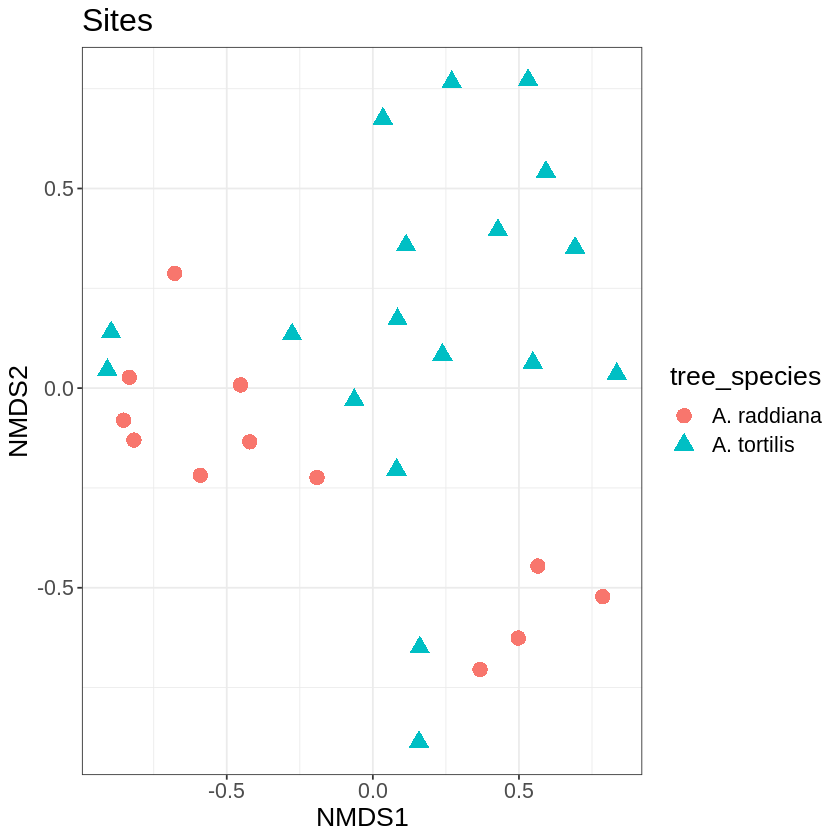

In [66]:
GP.ord <- ordinate(physeq_endor, "NMDS", "bray")
#pdf('NMDS_endo.pdf')
p<- plot_ordination(physeq_endor, GP.ord, type="samples", color="tree_species", title="Sites",shape="tree_species")
p + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)
#dev.off()

### Supplementary Figure 6A and B

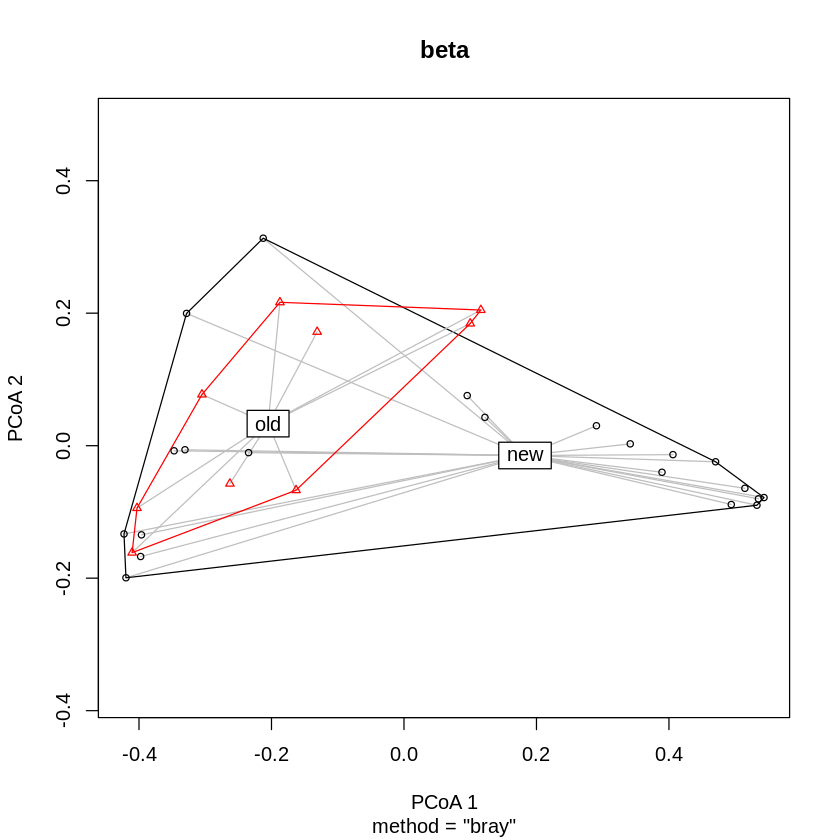

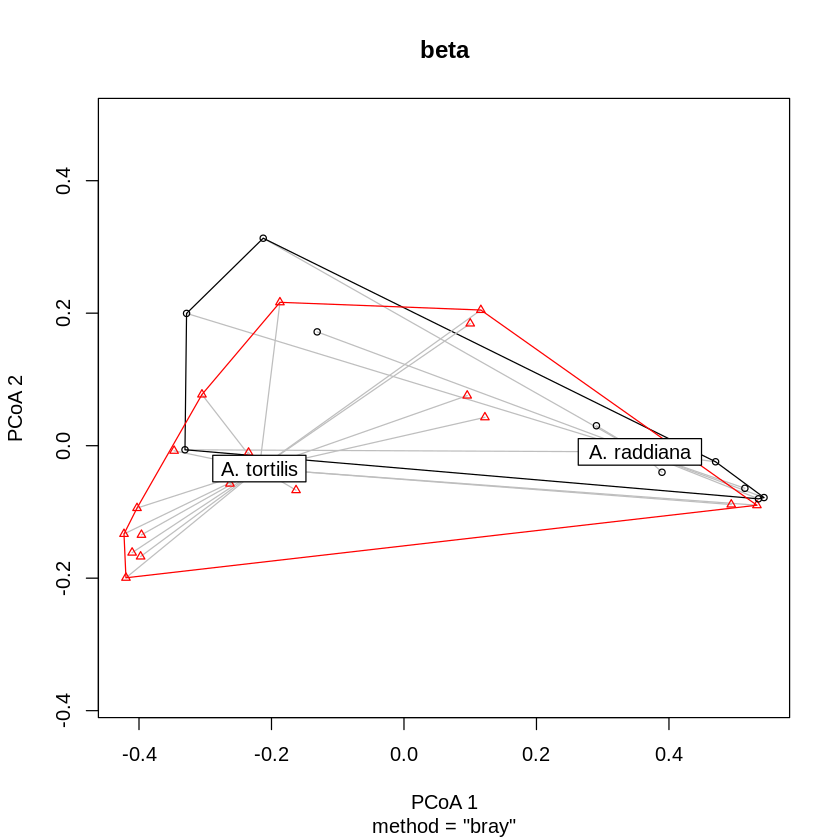

In [67]:
erie_bray <- phyloseq::distance(physeq_endor, method = "bray")
beta <- betadisper(erie_bray, sampledf_endor$shedding)
#pdf("Supp Figure 6A.pdf")
plot(beta)
#dev.off()

erie_bray <- phyloseq::distance(physeq_endor, method = "bray")
beta <- betadisper(erie_bray, sampledf_endor$tree_species)
#pdf("Supp Figure 6B.pdf")
plot(beta)
#dev.off()

In [68]:
ps1t= transform_sample_counts(physeq_endor, function(x) x / sum(x) )

In [69]:
ps1tr = filter_taxa(ps1t, function(x) sum(x) < 1, TRUE)

### Supplementary Figure 7A and B

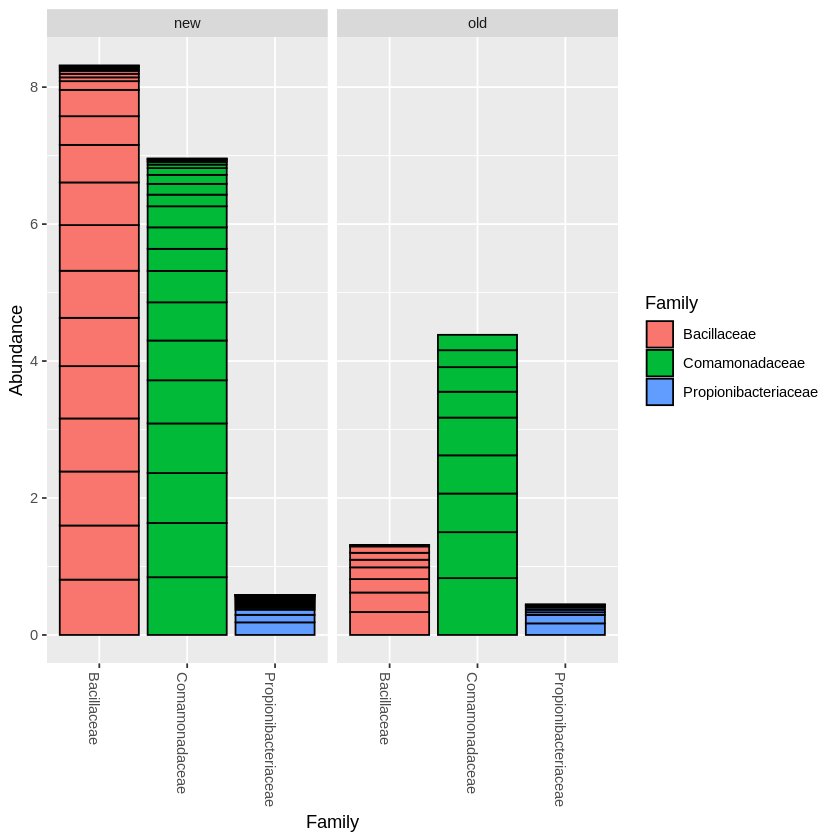

In [70]:
rmtaxa = taxa_names(ps1tr)
alltaxa = taxa_names(ps1t)
myTaxa = alltaxa[!alltaxa %in% rmtaxa]
ps2 <- prune_taxa(myTaxa,ps1t)
#pdf('supp figure 7A.pdf')
plot_bar(ps2, "Family", fill="Family", facet_grid=~shedding)
#dev.off()

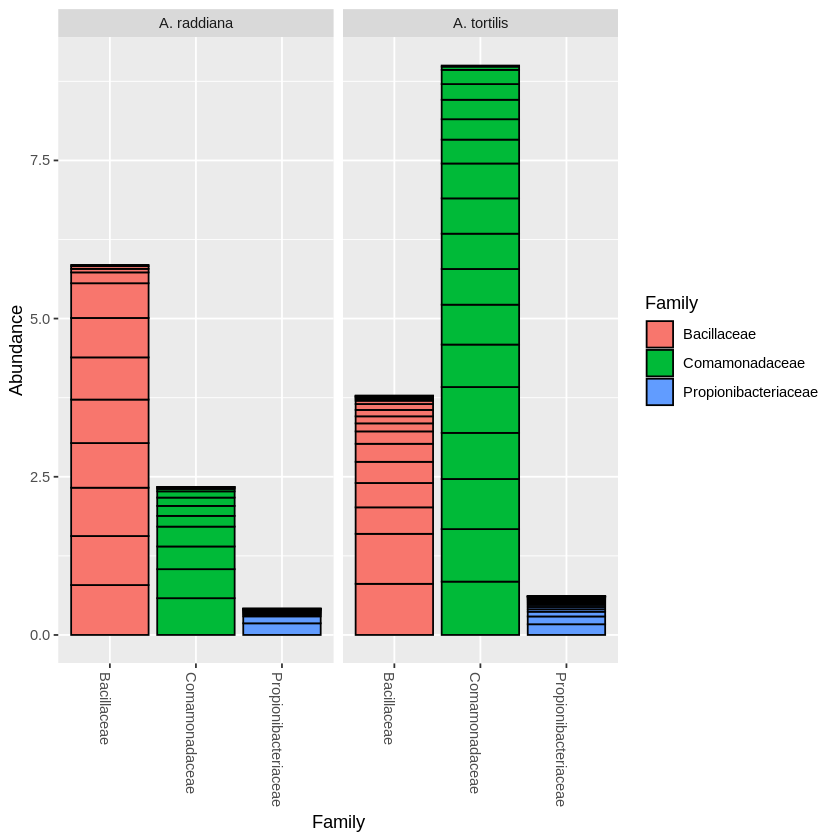

In [71]:
#pdf('supp figure 7B.pdf')
plot_bar(ps2, "Family", fill="Family", facet_grid=~tree_species)
#dev.off()

# original Figure 2B

Run 0 stress 0.0795147 
Run 1 stress 0.0795147 
... Procrustes: rmse 6.03428e-06  max resid 1.849339e-05 
... Similar to previous best
Run 2 stress 0.143783 
Run 3 stress 0.1671181 
Run 4 stress 0.08044386 
Run 5 stress 0.0795147 
... Procrustes: rmse 2.971588e-06  max resid 1.132786e-05 
... Similar to previous best
Run 6 stress 0.1441561 
Run 7 stress 0.143783 
Run 8 stress 0.0795147 
... Procrustes: rmse 5.442269e-06  max resid 1.775011e-05 
... Similar to previous best
Run 9 stress 0.0795147 
... Procrustes: rmse 1.008949e-05  max resid 3.059074e-05 
... Similar to previous best
Run 10 stress 0.0795147 
... Procrustes: rmse 1.307445e-05  max resid 4.928864e-05 
... Similar to previous best
Run 11 stress 0.0795147 
... Procrustes: rmse 7.675427e-06  max resid 2.931651e-05 
... Similar to previous best
Run 12 stress 0.0795147 
... New best solution
... Procrustes: rmse 5.269934e-06  max resid 1.864398e-05 
... Similar to previous best
Run 13 stress 0.08044639 
Run 14 stress 0.0795147

[1] 0.009

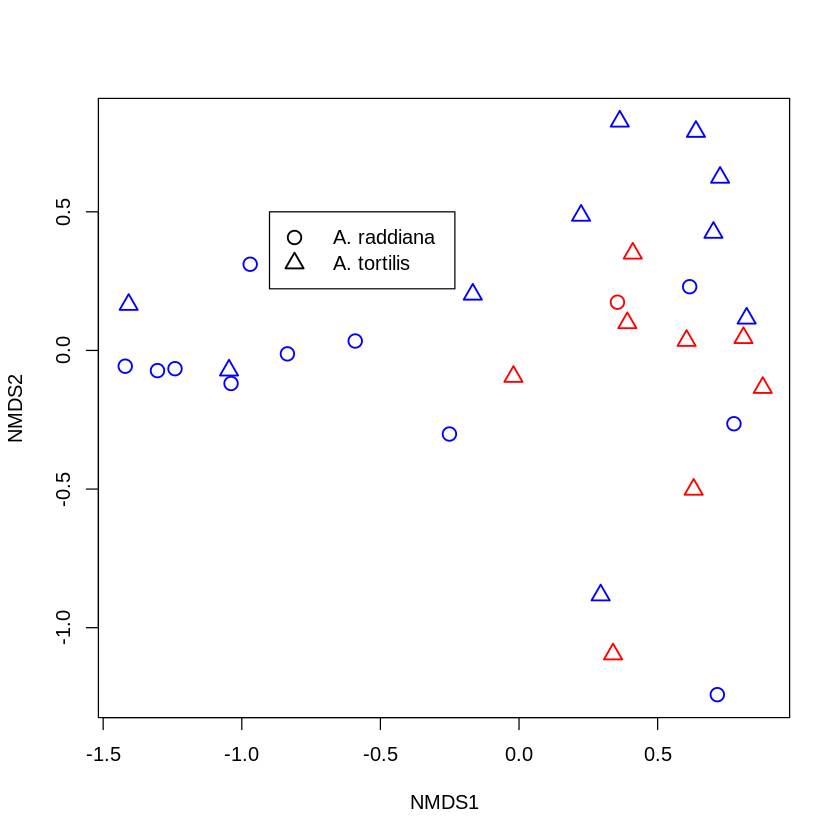

In [72]:
otu<-read.table("core_all_R.txt",header=T,sep="\t",fill=T,row.names=1)
otu2<-otu[,1:(dim(otu)[2]-7)]
otus<-otu2
t_otus <- as.data.frame(t(otus))
#t_otus<-decostand(t_otus,method="total")

map<-read.table("F649_R889_map_r_MS.csv",row.names=1,sep=",",header=T)
map2<-map[map$Canopy=="South",]
x<-subset(t_otus[rownames(map2),])
p<-cbind(map2,x)
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")


p<-p[p$sample_type=="Endophytes",]
write.table(p,"p.txt",sep="\t",quote=FALSE)
p<-read.table("p.txt",header=T,row.names=1,sep="\t")
pp<-p[,((dim(map2)[2])+1):dim(p)[2]]
ppp<-pp[,!!colSums(pp)]
l<-anosim((as.matrix((vegdist(ppp,distance="bray")))),grouping=p$tree_species)

NMDS_bray<-metaMDS(ppp,distance="bray",k=2,trymax=10000,autotransform=F)
zz<-scores(NMDS_bray,display="site")


colfunc<-colorRampPalette(c("blue", "red"))

#pdf("Figure 2B_Endo.pdf")
 plot(NMDS_bray,dis="site",type="n")
 points(NMDS_bray,pch=as.numeric(p$tree_species),cex=1.5,lwd=1.5, col=colfunc(2)[p$shedding])
legend(x=-0.9,y=0.5,legend=unique(p$tree_species),pch=unique(as.numeric(p$tree_species)),pt.cex=1.5,lwd=1.5,lty=NA)
text(y=1,x=1,label=paste("Stress=",round(NMDS_bray$stress,digits=4)))
text(y=1.3,x=0.6,label=paste("p-value=",l$signif))
# #text(y=-0.9,x=0.8,label=paste("p-value=",l_exo$signif),col="red")
# title("Endosphere  bacterial communities (South canopy face)",font.main=1,cex.main=1,adj=0)
#dev.off()


l$signif